In [35]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd # for data manipulation and analysis
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For creating static visualization
import seaborn as sns # For creating statistical graphics and enhancing plot

In [36]:
from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

In [37]:
# Loading dataset from csv file into a pandas dataframe
df = pd.read_csv("Daily_Global_Stock_Market_Indicators.csv")

# Checking the first five rows of the datagrame
df.head()

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent
0,2020-01-01,S&P 500,USA,15607.06,16277.38,15427.47,16057.78,36788921,2.89
1,2020-01-01,NASDAQ Composite,USA,7083.79,7343.64,6461.54,6641.87,22249687,-6.24
2,2020-01-01,Dow Jones,USA,26384.65,26601.25,25659.50,25941.06,4344769,-1.68
3,2020-01-01,FTSE 100,UK,8091.17,8182.45,7617.15,7774.58,44250411,-3.91
4,2020-01-01,Nikkei 225,Japan,1899.43,2044.17,1885.43,1924.21,22498555,1.30


In [38]:
# checking last 5 rows of the dataframe
df.tail(5)

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent
18265,2024-12-31,Hang Seng,Hong Kong,1718.84,2027.75,1639.67,2017.82,47658304,17.39
18266,2024-12-31,DAX,Germany,1513.68,1933.41,1485.06,1921.63,13456944,26.95
18267,2024-12-31,CAC 40,France,8944.27,9018.54,8608.51,8737.25,36520735,-2.31
18268,2024-12-31,SSE Composite,China,14674.14,15131.30,14415.31,14888.37,43850831,1.46
18269,2024-12-31,KSE 100,Pakistan,11151.86,11574.65,10995.48,11387.51,15879687,2.11


In [39]:
# Checking the column name
df.columns

Index(['Date', 'Index_Name', 'Country', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Daily_Change_Percent'],
      dtype='object')

In [40]:
# Checking the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18270 non-null  object 
 1   Index_Name            18270 non-null  object 
 2   Country               18270 non-null  object 
 3   Open                  18270 non-null  float64
 4   High                  18270 non-null  float64
 5   Low                   18270 non-null  float64
 6   Close                 18270 non-null  float64
 7   Volume                18270 non-null  int64  
 8   Daily_Change_Percent  18270 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [41]:
# Checking the shape of the dataframe
df.shape

(18270, 9)

The dataset has 18270 rows and 9 columns.

In [42]:
# statistical summary of the dataframe
df.describe()

,Open,High,Low,Close,Volume,Daily_Change_Percent
count,18270.000000,18270.000000,18270.000000,18270.000000,1.827000e+04,18270.000000
mean,20442.806842,20718.693753,20166.620486,20442.378464,2.560834e+07,0.006006
std,11257.356569,11260.177506,11258.553850,11261.448439,1.414837e+07,4.534069
min,1000.650000,1018.520000,349.960000,622.950000,1.005194e+06,-44.320000
25%,10743.355000,11011.495000,10471.052500,10736.957500,1.336530e+07,-1.250000
50%,20398.855000,20685.665000,20116.395000,20394.740000,2.573716e+07,-0.010000
75%,30208.945000,30470.575000,29938.702500,30186.750000,3.778344e+07,1.230000
max,39990.310000,40680.180000,39985.490000,40474.780000,4.999802e+07,45.690000


In [43]:
# statistical summary of categorical columns
df.describe(include='object')

,Date,Index_Name,Country
count,18270,18270,18270
unique,1827,10,8
top,2020-01-01,S&P 500,USA
freq,10,1827,5481


In [44]:
print("\nUnique Index Names:")
print(df['Index_Name'].unique())


Unique Index Names:
['S&P 500' 'NASDAQ Composite' 'Dow Jones' 'FTSE 100' 'Nikkei 225'
 'Hang Seng' 'DAX' 'CAC 40' 'SSE Composite' 'KSE 100']


In [45]:
print("\nUnique Countries:")
print(df['Country'].unique())


Unique Countries:
['USA' 'UK' 'Japan' 'Hong Kong' 'Germany' 'France' 'China' 'Pakistan']


In [46]:
# Checking whether the dataframe has missing value or not
df.isnull().sum()

Date                    0
Index_Name              0
Country                 0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Daily_Change_Percent    0
dtype: int64

Since the dataset has no missing value it is ready for further processes.

In [47]:
df.duplicated().sum()

0

The dataset has no duplicate values as well.

Outliner detection

In [48]:
# Checking the min, mean, median, max values of numerical columns to identify the ouliers

num_cols = df.select_dtypes(include=['number']).columns
stat = pd.DataFrame({
    'Min': df[num_cols].min(),
    'Mean': df[num_cols].mean(),
    'Median': df[num_cols].median(),
    'Max': df[num_cols].max()
})

stat = stat.round(2)
stat

,Min,Mean,Median,Max
Open,1000.65,20442.81,20398.86,39990.31
High,1018.52,20718.69,20685.66,40680.18
Low,349.96,20166.62,20116.40,39985.49
Close,622.95,20442.38,20394.74,40474.78
Volume,1005194.00,25608343.26,25737160.50,49998017.00
Daily_Change_Percent,-44.32,0.01,-0.01,45.69


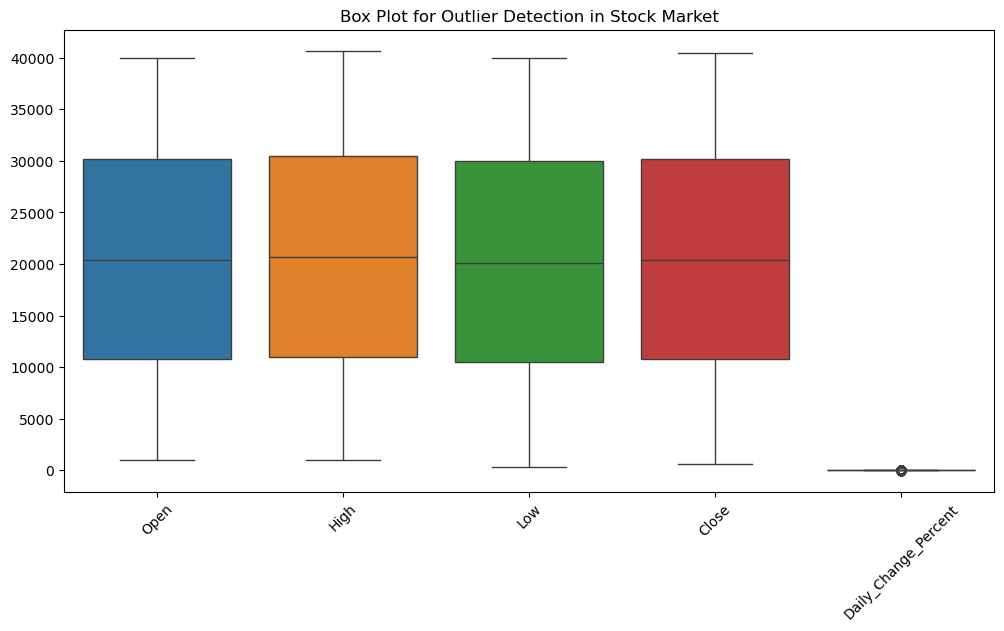

In [49]:
# Selecting numerical columns for outlier detection
cols = ['Open', 'High', 'Low', 'Close', 'Daily_Change_Percent']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols])
plt.title("Box Plot for Outlier Detection in Stock Market")
plt.xticks(rotation=45)
plt.show()

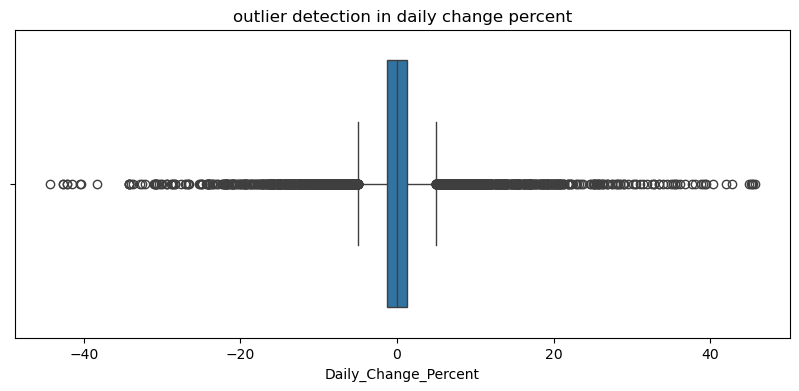

In [50]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Daily_Change_Percent'])
plt.title('outlier detection in daily change percent')
plt.show()

In [51]:
# Selecting column
data = df['Daily_Change_Percent']

# Calculate Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Defining fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Finding outliers
outliers = []
for value in data:
    if value < lower_fence or value > upper_fence:
        outliers.append(value)

len(outliers), outliers[:10]

(1905, [-6.24, 5.72, -6.32, -6.51, -19.44, 5.9, -6.97, -29.33, 7.47, -11.83])

In [52]:
lower_fence, upper_fence

(-4.97, 4.949999999999999)

In [55]:
# Clipping outliers (best for stock data)
# extreme values are capped while keeping the data size unchanged
df['Daily_Change_Percent_Clipped'] = df['Daily_Change_Percent'].clip(lower_fence, upper_fence)

In [56]:
df.sample(5)

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent,Daily_Change_Percent_Clipped
17626,2024-10-28,DAX,Germany,27398.47,27625.15,27296.11,27546.41,13669378,0.54,0.54
18171,2024-12-22,NASDAQ Composite,USA,36523.88,36674.70,36326.79,36357.09,47006261,-0.46,-0.46
13840,2023-10-16,S&P 500,USA,4624.21,5080.98,4378.17,4960.36,1162270,7.27,4.95
16916,2024-08-18,DAX,Germany,15774.25,15884.98,15538.88,15681.02,22402466,-0.59,-0.59
17502,2024-10-16,Dow Jones,USA,35956.04,36070.73,35336.12,35531.16,4695991,-1.18,-1.18


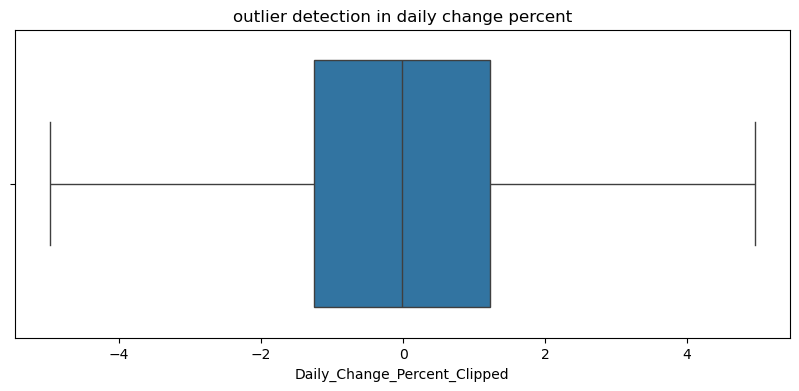

In [74]:
# checking the outliers once again after removing it.
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Daily_Change_Percent_Clipped'])
plt.title('outlier detection in daily change percent')
plt.show()

DATA TRANSFORMATION

ONE HOT ENCODING

In [58]:

# Encoding the Index name column using one-hot encoding
dummies = pd.get_dummies(df['Index_Name'], drop_first=True)
df_encoded = pd.concat([df, dummies], axis=1) 
# Joining the encoded column to origanl dataset
df_encoded.sample(5)

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent,Daily_Change_Percent_Clipped,DAX,Dow Jones,FTSE 100,Hang Seng,KSE 100,NASDAQ Composite,Nikkei 225,S&P 500,SSE Composite
4072,2021-02-11,Dow Jones,USA,38816.81,39127.50,38734.99,38972.85,8940899,0.40,0.40,False,True,False,False,False,False,False,False,False
15161,2024-02-25,NASDAQ Composite,USA,4348.47,4512.81,3985.67,4280.46,16132922,-1.56,-1.56,False,False,False,False,False,True,False,False,False
10479,2022-11-13,KSE 100,Pakistan,27061.62,27364.12,26989.48,27208.45,22280292,0.54,0.54,False,False,False,False,True,False,False,False,False
12652,2023-06-19,Dow Jones,USA,20218.71,20423.18,19454.75,19754.01,6050109,-2.30,-2.30,False,True,False,False,False,False,False,False,False
10596,2022-11-25,DAX,Germany,28034.15,28526.71,27877.75,28473.08,40842064,1.57,1.57,True,False,False,False,False,False,False,False,False


CREATING NEW FEATURE

In [59]:
df['Daily_Range'] = df['High'] - df['Low']
df['Price_Change'] = df['Close'] - df['Open']
df['Direction'] = df['Price_Change'].apply(lambda x: 1 if x > 0 else 0) # lable encoding

Daily Range = This measures volatility. A large range suggests a wild day with significant price movement, while a small range suggests a quiet, stable day.

Price Change = This tells the magnitude and direction of the move. If the result is positive, the price went up; if negative, it went down.

Directio = It looks at the Price change calculated and assigns 1 if the change is greater than 0. Otherwise, it assigns a 0.

In [60]:
df.sample(5)

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent,Daily_Change_Percent_Clipped,Daily_Range,Price_Change,Direction
2024,2020-07-21,Nikkei 225,Japan,1767.65,2149.39,1523.69,2003.29,7496776,13.33,4.95,625.70,235.64,1
13640,2023-09-26,S&P 500,USA,32378.71,32490.88,32047.78,32071.66,47897809,-0.95,-0.95,443.10,-307.05,0
10665,2022-12-02,Hang Seng,Hong Kong,24193.84,24267.94,23841.56,23984.38,5511092,-0.87,-0.87,426.38,-209.46,0
4271,2021-03-03,NASDAQ Composite,USA,7178.66,7814.40,7164.69,7657.33,49311125,6.67,4.95,649.71,478.67,1
15035,2024-02-12,Hang Seng,Hong Kong,26756.12,27001.89,26150.32,26341.47,33687147,-1.55,-1.55,851.57,-414.65,0


In [61]:
# Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(f"\nDate Range: {df['Date'].min()} to {df['Date'].max()}")


Date Range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00


In [62]:
# Separating the year, month and from Date

df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']   = df['Date'].dt.day
df.sample(3)

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent,Daily_Change_Percent_Clipped,Daily_Range,Price_Change,Direction,Year,Month,Day
8034,2022-03-14,Nikkei 225,Japan,13196.40,13279.85,12916.05,13201.99,28104127,0.04,0.04,363.80,5.59,1,2022,3,14
12809,2023-07-04,KSE 100,Pakistan,25254.34,25745.47,25089.63,25692.99,44185349,1.74,1.74,655.84,438.65,1,2023,7,4
4181,2021-02-22,NASDAQ Composite,USA,29190.99,29919.30,29129.72,29660.76,5415747,1.61,1.61,789.58,469.77,1,2021,2,22


In [63]:
# Dropping the date column
df = df.drop('Date', axis =1)
df

,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent,Daily_Change_Percent_Clipped,Daily_Range,Price_Change,Direction,Year,Month,Day
0,S&P 500,USA,15607.06,16277.38,15427.47,16057.78,36788921,2.89,2.89,849.91,450.72,1,2020,1,1
1,NASDAQ Composite,USA,7083.79,7343.64,6461.54,6641.87,22249687,-6.24,-4.97,882.10,-441.92,0,2020,1,1
2,Dow Jones,USA,26384.65,26601.25,25659.50,25941.06,4344769,-1.68,-1.68,941.75,-443.59,0,2020,1,1
3,FTSE 100,UK,8091.17,8182.45,7617.15,7774.58,44250411,-3.91,-3.91,565.30,-316.59,0,2020,1,1
4,Nikkei 225,Japan,1899.43,2044.17,1885.43,1924.21,22498555,1.30,1.30,158.74,24.78,1,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,Hang Seng,Hong Kong,1718.84,2027.75,1639.67,2017.82,47658304,17.39,4.95,388.08,298.98,1,2024,12,31
18266,DAX,Germany,1513.68,1933.41,1485.06,1921.63,13456944,26.95,4.95,448.35,407.95,1,2024,12,31
18267,CAC 40,France,8944.27,9018.54,8608.51,8737.25,36520735,-2.31,-2.31,410.03,-207.02,0,2024,12,31
18268,SSE Composite,China,14674.14,15131.30,14415.31,14888.37,43850831,1.46,1.46,715.99,214.23,1,2024,12,31


EXPLORATORY DATA ANALYSIS (EDA)

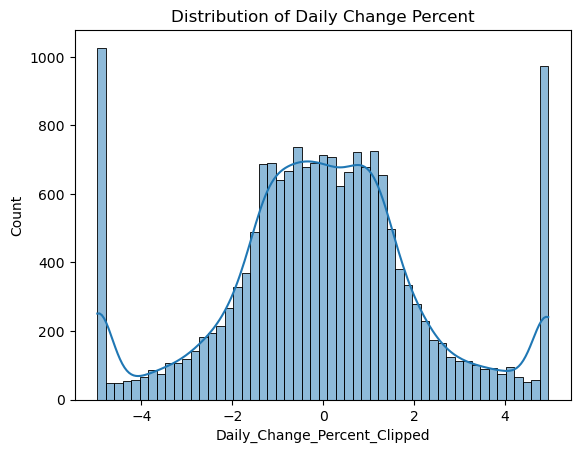

In [75]:
plt.figure()
sns.histplot(df['Daily_Change_Percent_Clipped'], kde=True)
plt.title("Distribution of Daily Change Percent")
plt.show()

While most stock returns look like a standard bell curve, this one is showing heavy clumping at the extreme edges (around -5% and +5%). the two huge bars at the very far left and far right shows that the data has been clipped. Beacuse of the clipping the stock has an equal chance of a big Up day vs a big Down day therefore it might not be recommended for machine learning.

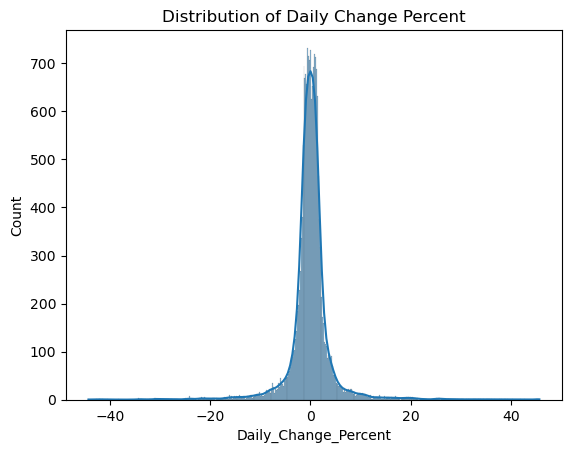

In [76]:
# histogram of the raw data

plt.figure()
sns.histplot(df['Daily_Change_Percent'], kde=True)
plt.title("Distribution of Daily Change Percent")
plt.show()

The histogram shows how much a stock price changes every single day. The tall spike in the middle at 0 tells us that on most days, almost nothing happens. The price usually stays very close to where it started, or only moves by a tiny fraction (like 0.5% or 1%).

The horizontal line that stretches far to the left (-40) and far to the right (+40) represents rare days where the price crashed massively (e.g losing 20% or 40% in one day) and rare days where the price skyrocketed (e.g. gaining 20% or 40% in one day).

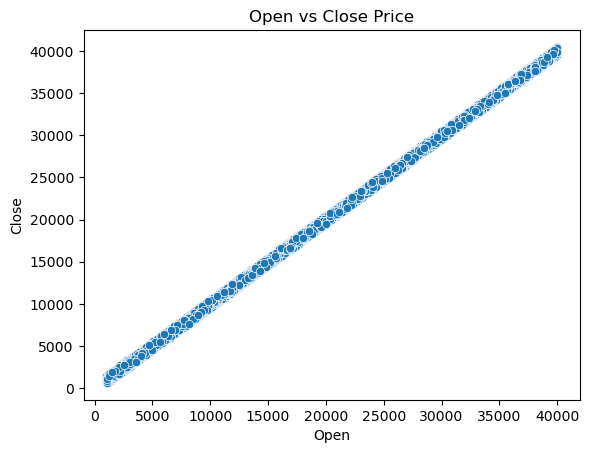

In [ ]:
# Scatter Plot comparing Open price to Close price
plt.figure()
sns.scatterplot(x=df['Open'], y=df['Close'])
plt.title("Open vs Close Price")
plt.show()

The dots form a nearly perfect straight line pointing up and to the right. This means there is a high positive correlation. If the price opens high, it almost always closes high. If it opens low, it closes low.

<Figure size 1000x600 with 0 Axes>

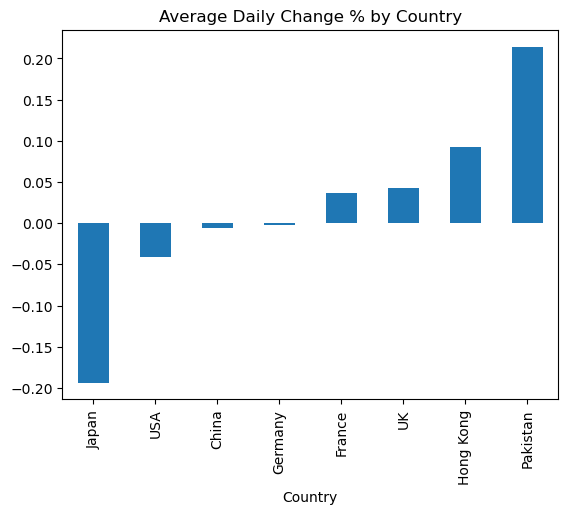

In [111]:
# Country-wise Average Daily Change
country_change = df.groupby('Country')['Daily_Change_Percent'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.figure()
country_change.plot(kind='bar')
plt.title("Average Daily Change % by Country")
plt.show()

The bars tell us whether a country's market generally went up or down on an average day.

Pakistan, Hong Kong, UK, and France saw their markets grow on average each day. Pakistan is the clear leader here with the highest average daily gain.

Japan, USA, China, and Germany saw their markets decrease on average. Japan experienced the largest average daily drop.

Text(0, 0.5, 'Standard Deviation')

<Figure size 1000x600 with 0 Axes>

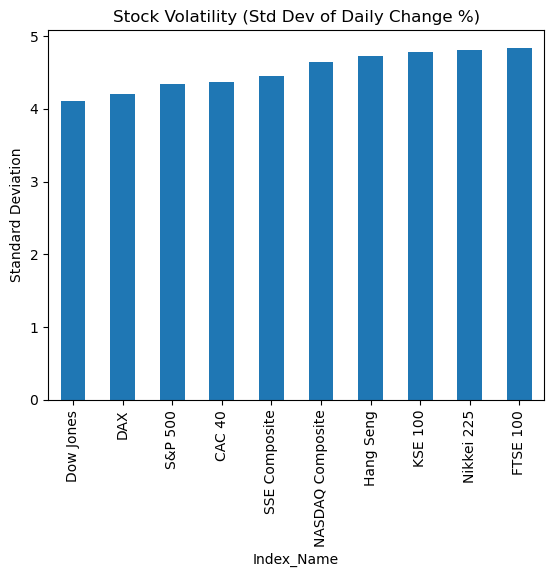

In [110]:
# Stock Volitility
stock_change = df.groupby('Index_Name')['Daily_Change_Percent'].std().sort_values()

plt.figure(figsize=(10, 6))
plt.figure()
stock_change.plot(kind='bar')
plt.title("Stock Volatility (Std Dev of Daily Change %)")
plt.ylabel("Standard Deviation")

This chart provides a direct comparison of market risk (volatility) across ten major global stock indices.

Least Volatile: The Dow Jones shows the lowest standard deviation, suggesting it was the most stable index in this dataset.

Most Volatile: The FTSE 100 and Nikkei 225 sit at the top, indicating they experienced the largest price swings.

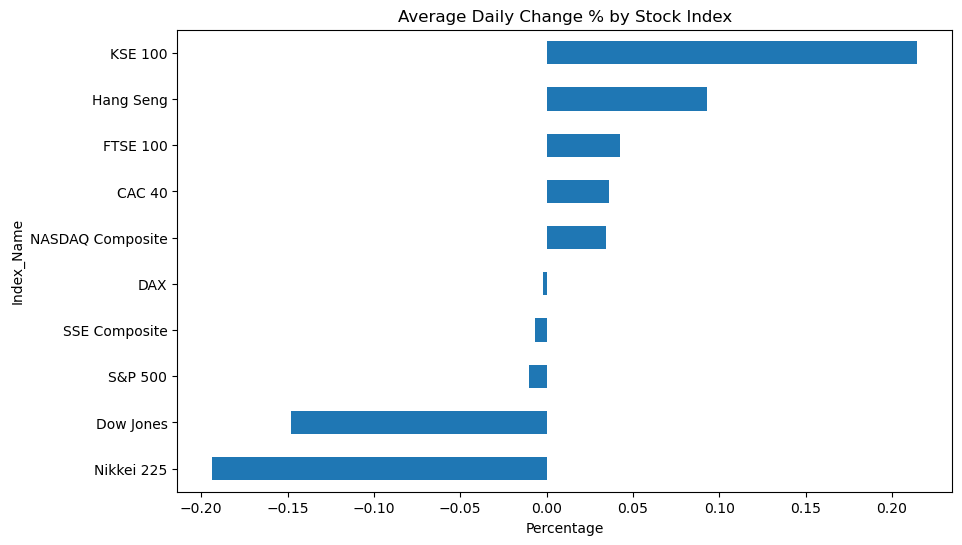

In [118]:
#average daily performance across different stock
stock_change = df.groupby('Index_Name')['Daily_Change_Percent'].mean().sort_values()

plt.figure(figsize=(10, 6))
stock_change.plot(kind='barh')
plt.title("Average Daily Change % by Stock Index")
plt.xlabel("Percentage")
plt.show()

The bar graph ranks the stock markets from the worst performing to best performing based on their average daily percentage change.

The KSE 100 stands out as the clear leader in this dataset, with an average daily gain exceeding 0.20%.

The Nikkei 225 has the most significant negative average, dropping nearly -0.20% daily.

Several major indices like the SSE Composite and DAX are hovering very close to the zero line, suggesting they remained relatively stagnant.

The data akso shows the NASDAQ Composite is in positive territory, while the Dow Jones and S&P 500 show negative average daily changes.

After comparing both the mean and standard deviation KSE 100 seems to be the most volitle one. This means you could see massive gains one day and equally massive losses the next.

From an investment standpoint, Nikkei 225 looks like the "worst". It has high volatility (almost as much as KSE 100) but a negative average return. You are taking on a lot of risk for a losing result.

If you look for a balance between the two charts, the NASDAQ shows a solid positive return with "mid-range" volatility compared to the others.

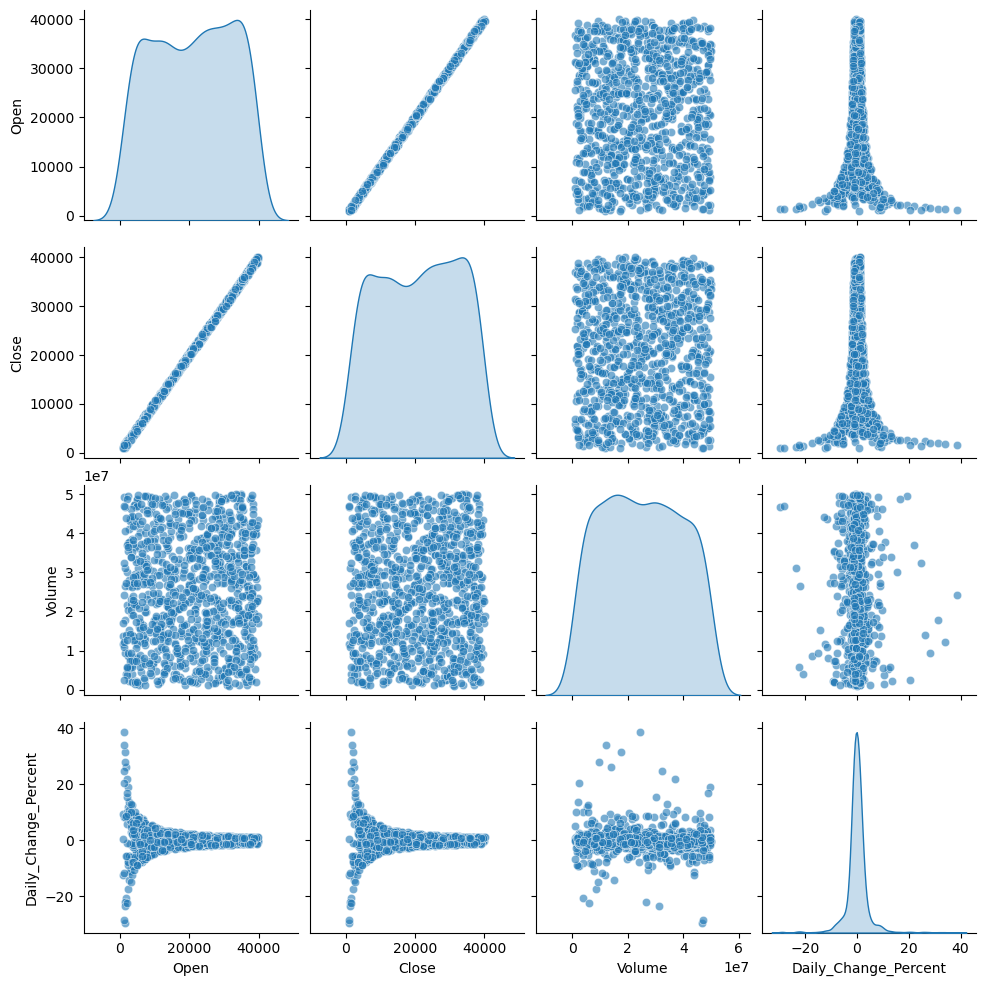

In [88]:
# Pair Plot
pairplot_cols = ['Open', 'Close', 'Volume', 'Daily_Change_Percent']
sns.pairplot(df[pairplot_cols].sample(1000), diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

The diagnol aquares from the top-left to the bottom-right, shows KDE (Kernel Density Estimation) plots instead of scatter plots. These show the distribution of a single variable. For example, the "Daily_Change_Percent" diagonal shows a very sharp, thin peak, confirming that most days have a change percentage near 0%.

All the other squares are scatter plots that show how two different variables interact.
Open vs. Close: This forms a perfect, tight diagonal line, proving that the price at the start of the day is almost identical to the price at the end.
Volume vs. Price: These look like "blocks" of dots with no clear direction. This tells us that trading volume doesn't necessarily go up just because the price is higher.

The funnel shape : Looking at the bottom row where Daily_Change_Percent is compared to Open or Close, we see a "funnel" or "T" shape. This indicates that as the price (Open/Close) gets higher, the percentage swings (Daily_Change_Percent) tend to stay more concentrated near zero, whereas lower prices see more varied percentage swings.


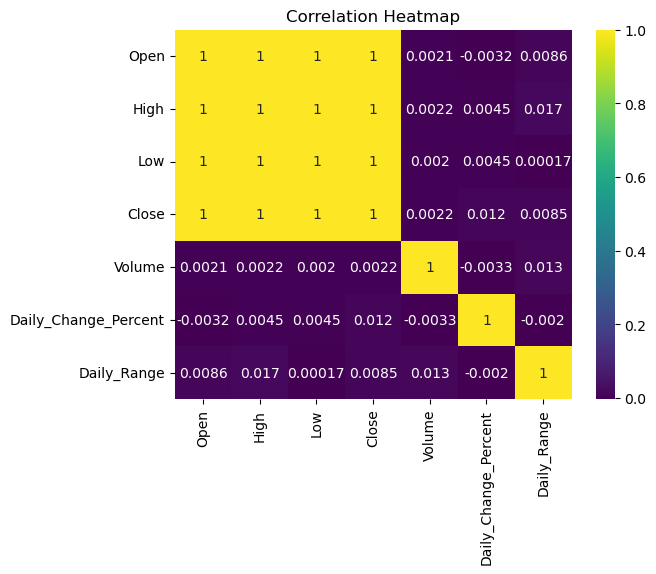

In [122]:
plt.figure()
corr = df[['Open','High','Low','Close','Volume','Daily_Change_Percent','Daily_Range']].corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

The most striking insight from the heatmap is the near-zero correlation (-0.0032$ to 0.012) between the Daily_Change_Percent and the absolute price values (Open, High, Low, Close).

It suggest that a stock being expensive has almost no bearing on whether it will go up or down on a given day.

The bright yellow block in the top-left of the heatmap shows a perfect correlation (1.0) between Open, High, Low, and Close.If the "High" is rising, the "Close" is almost certainly following it.

There is a very low correlation between Volume and Daily_Change_Percent (-0.0033). High trading activity does not automatically mean the price will go up.

In [123]:
cleaned_dataset = df.to_csv('Cleaned Daily_Global_Stock.csv')